## Nama  : M. Yogi Dwiyanto
## Nim : 221351073
## Kelas : Pagi C
### DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns


In [2]:
df = pd.read_csv("net_detection.csv")

In [3]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal


In [4]:
protocol_counts = df['protocol'].value_counts()
protocol_counts

protocol
TCP     676
UDP     674
ICMP    650
Name: count, dtype: int64

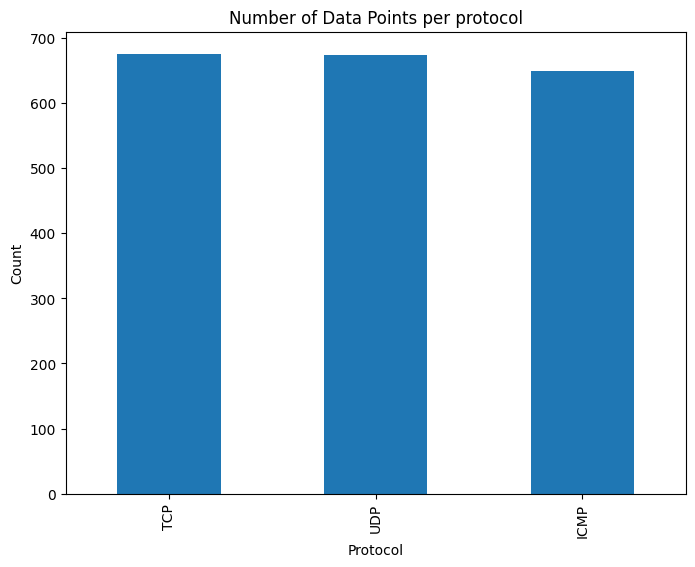

In [5]:
plt.figure(figsize=(8,6))
protocol_counts.plot(kind='bar')
plt.title("Number of Data Points per protocol")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.show()

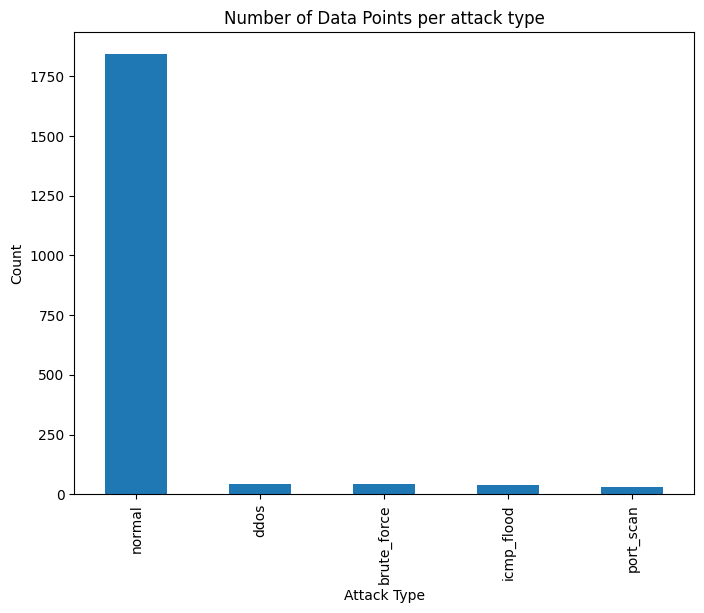

In [6]:
# 1. Lakukan perhitungan untuk mendapatkan jumlah pada kolom “attack_type” dan buatkan bar
#    plot nya
protocol_counts = df['attack_type'].value_counts()
protocol_counts
plt.figure(figsize=(8,6))
protocol_counts.plot(kind='bar')
plt.title("Number of Data Points per attack type")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Source Port')

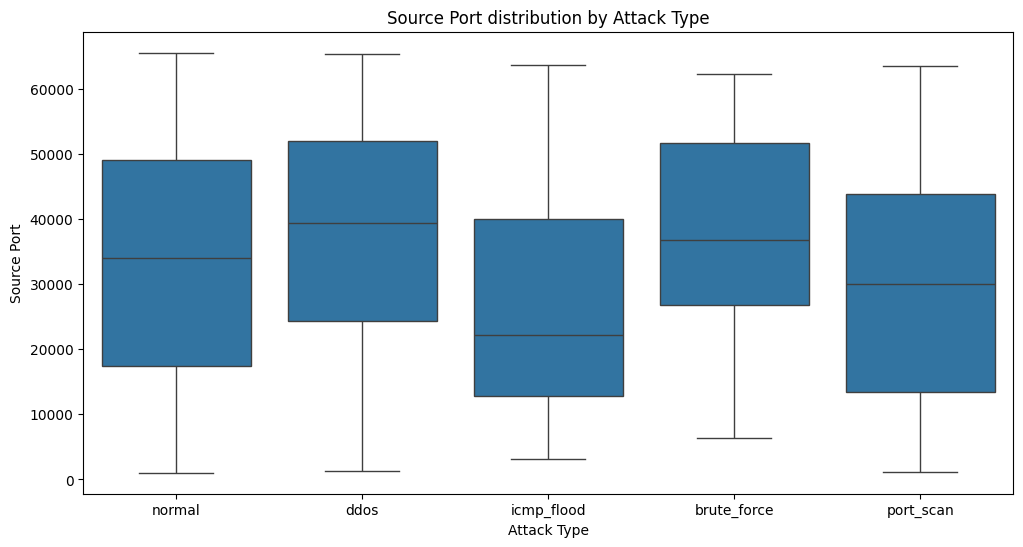

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='attack_type', y='src_port', data=df)
plt.title("Source Port distribution by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Source Port")

Text(0, 0.5, 'Bytes Sent')

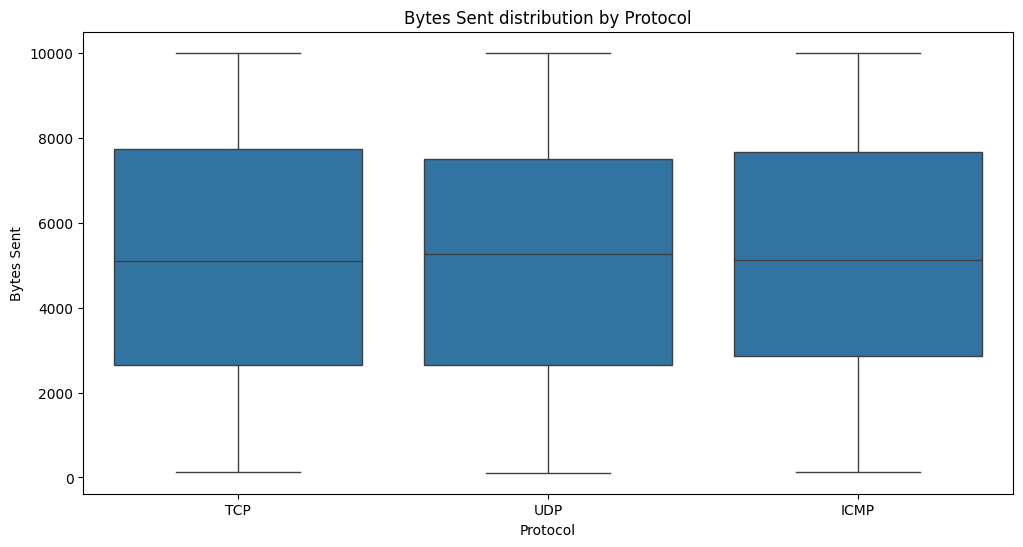

In [8]:
#2. Buatkan boxplot untuk menampilkan bytes_sent dan berdasarkan senis protocol
plt.figure(figsize=(12,6))
sns.boxplot(x='protocol', y='bytes_sent', data=df)
plt.title("Bytes Sent distribution by Protocol")
plt.xlabel("Protocol")
plt.ylabel("Bytes Sent")

### Model DBSCAN

In [9]:
# Pilih fitur clustering
features = ['src_port', 'dst_port', 'bytes_sent', 'bytes_received']
X = df[features]

In [10]:
# Standarize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
## Implementasi algoritma DBSCAN
# Tentukan nilai epsilon dan min sample
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

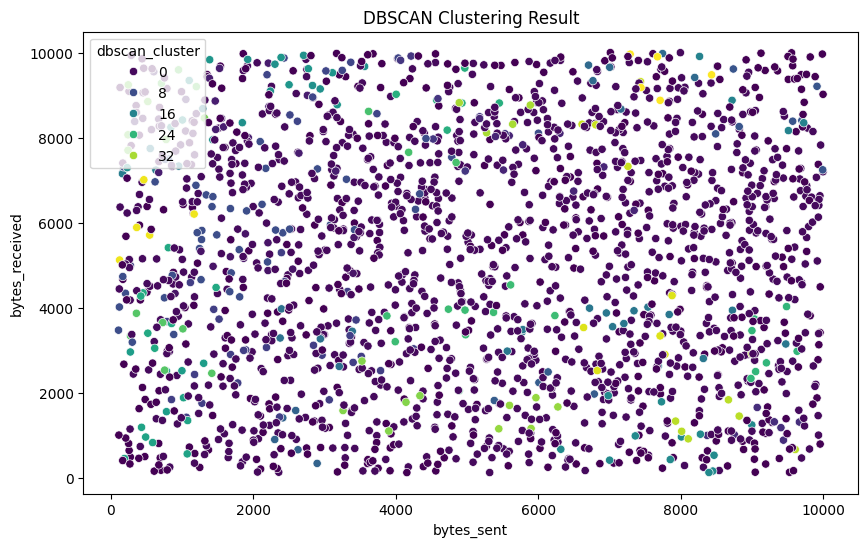

In [12]:
# Plot Hasil Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x='bytes_sent', y='bytes_received',
                hue='dbscan_cluster', data=df, palette='viridis')
plt.title("DBSCAN Clustering Result")
plt.show()

In [13]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0


In [14]:
# Memisahkan data anomaly yang bernilai -1
df['anomaly'] = df['dbscan_cluster'] == -1

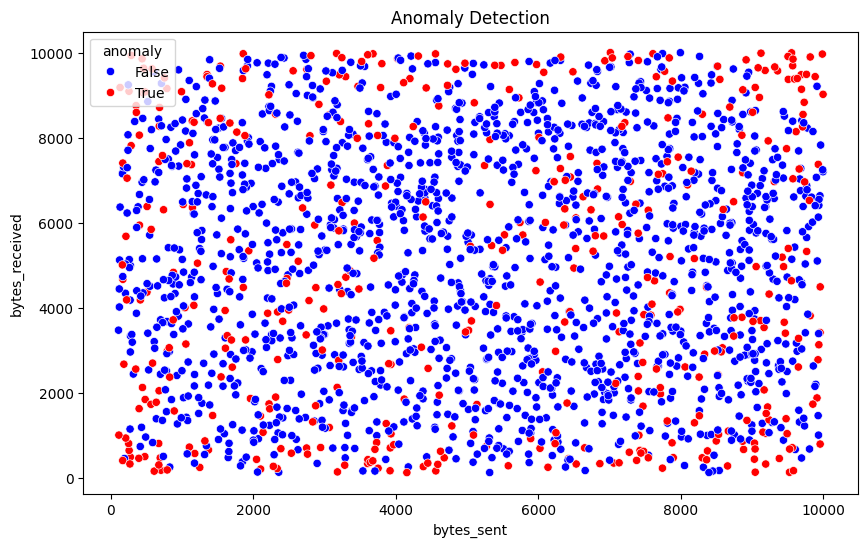

In [15]:
# Plot Hasil deteksi anomali
plt.figure(figsize=(10,6))
sns.scatterplot(x='bytes_sent',y='bytes_received',
                hue='anomaly',data=df, palette=['blue', 'red'] 
                )
plt.title("Anomaly Detection")
plt.show()

In [16]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster,anomaly
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1,True
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0,False
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1,True
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1,True
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0,False


In [17]:
# Simpan Hasil Cluster
df.to_csv('hasil_dbscan.csv', index=False)

In [18]:
# Membuat df untuk type serangan ddos
ddos_df = df[df['attack_type'] == 'ddos']

In [19]:
# Hitung jumlah anomali nya
anomaly_counts = ddos_df['anomaly'].value_counts()
anomaly_counts

anomaly
False    35
True      8
Name: count, dtype: int64

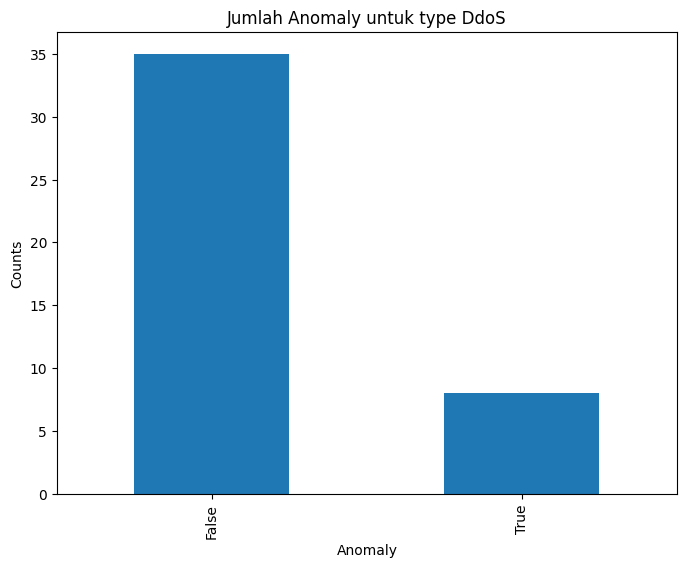

In [20]:
# Bar Plot untuk serangan DDOS
plt.figure(figsize=(8,6))
anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly untuk type DdoS')
plt.xlabel("Anomaly")
plt.ylabel("Counts")
plt.show()

In [21]:
# Lakukan analisis untuk deteksi anomaly pada jenis serangan lainnya seperti brute force, icmp flood, 
# dan port scan

# Brute Force
bruteforce_df = df[df['attack_type'] == 'brute_force']
anomaly_counts = bruteforce_df['anomaly'].value_counts()
anomaly_counts

anomaly
False    35
True      8
Name: count, dtype: int64

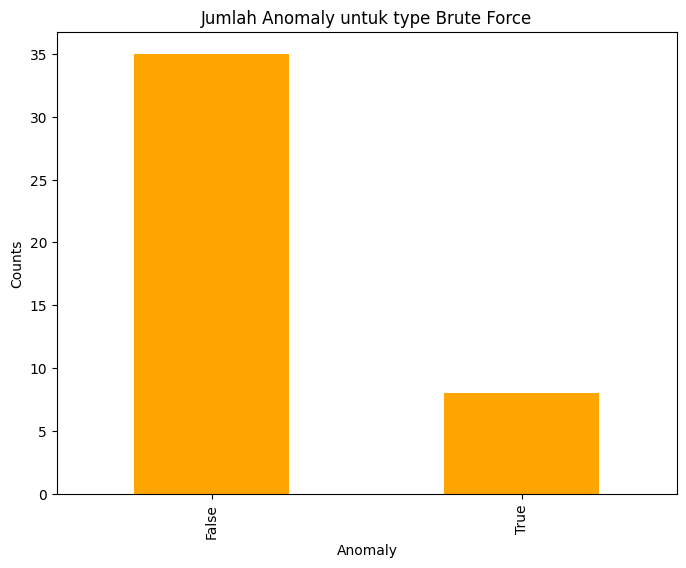

In [22]:
# Bar Plot untuk serangan Brute Force
plt.figure(figsize=(8,6))
anomaly_counts.plot(kind='bar', color='orange')
plt.title('Jumlah Anomaly untuk type Brute Force')
plt.xlabel("Anomaly")
plt.ylabel("Counts")
plt.show()

In [23]:
#ICMP Flood
icmpflood_df = df[df['attack_type'] == 'icmp_flood']
anomaly_counts = icmpflood_df['anomaly'].value_counts()
anomaly_counts

anomaly
False    36
True      4
Name: count, dtype: int64

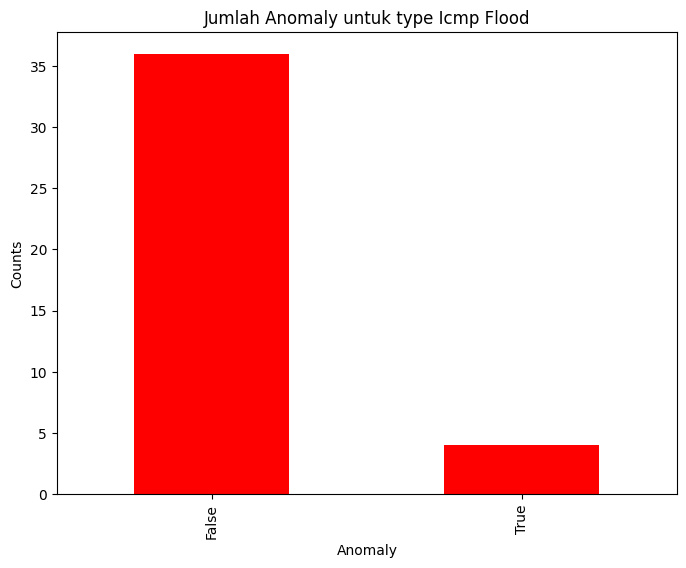

In [24]:
# Bar Plot untuk serangan ICMP Flood
plt.figure(figsize=(8,6))
anomaly_counts.plot(kind='bar', color='red')
plt.title('Jumlah Anomaly untuk type Icmp Flood')
plt.xlabel("Anomaly")
plt.ylabel("Counts")
plt.show()

In [25]:
# Port Scan
portscan_df = df[df['attack_type'] == 'port_scan']
anomaly_counts = portscan_df['anomaly'].value_counts()
anomaly_counts

anomaly
False    23
True      9
Name: count, dtype: int64

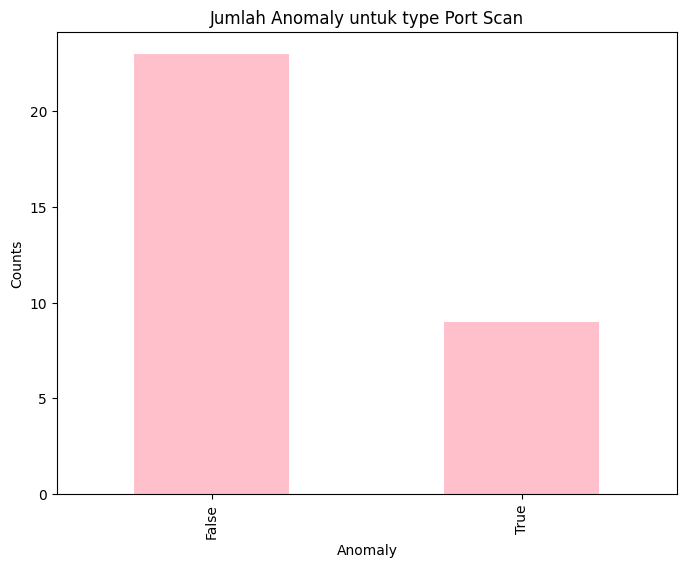

In [26]:
# Bar Plot untuk serangan Port Scan
plt.figure(figsize=(8,6))
anomaly_counts.plot(kind='bar', color='pink')
plt.title('Jumlah Anomaly untuk type Port Scan')
plt.xlabel("Anomaly")
plt.ylabel("Counts")
plt.show()